In [1]:
import numpy as np
import random
from IPython.display import clear_output
import gym
import matplotlib.pyplot as plt

In [2]:
ALPHA = 0.1
GAMMA= 0.6
EPSILON = 0.05

In [5]:
class MDP():
    def __init__(self, action_tress=9):
        self.down, self.up = 0,1

        self.state_actions = {
            'X':[self.down, self.up],
            'Y':[i for i in range(action_tress)],
            'W':[self.down],
            'Z':[self.up]
        }

        self.transitions = {
            'X':{self.down: 'Z',
                 self.up: 'Y'},
            'Y':{ a: 'W' for a in range(action_tress)},
            'W':{self.down, 'Done'},
            'Z':{self.up, 'Done'}
        }

        self.state_space = 4
        self.actions = action_tress
        self.state = 'X'
    
    def _get_reward(self):
        return np.random.normal(-0.5, 1) if self.state == 'W' else 0

    def is_terminated_state(self):
        return True if self.state=='W' or self.state=='Z' else False
    
    def reset(self):
        self.state = 'X'
        return self.state
    def step(self, action):
        self.state = self.transitions[self.state][action]
        return self.state, self._get_reward(), self.is_terminated_state(), None
    
    def available_actions(self, state):
        return self.state_actions[state]
    
    def random_action(self):
        return np.random.choice(self.available_actions(self.state))

mdp_env = MDP()

In [8]:
mdp_env.available_actions('Y')

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [24]:
def mdp_q_learning(enviroment, num_of_tests = 1000, num_of_episodes=100):

    num_of_ups = np.zeros(num_of_episodes)
    
    for _ in range(num_of_tests):
        
        # Initialize Q-table
        q_table = {state: np.zeros(9) for state in enviroment.state_actions.keys()}
        rewards = np.zeros(num_of_episodes)

        for episode in range(0, num_of_episodes):
            # Reset the enviroment
            state = enviroment.reset()

            # Initialize variables
            terminated = False

            while not terminated:
                # Pick action a....
                if np.random.rand() < EPSILON:
                    action = enviroment.random_action()
                else:
                    available_actions = enviroment.available_actions(enviroment.state)
                    state_actions = q_table[state][available_actions]
                    max_q = np.where(np.max(state_actions) == state_actions)[0]
                    action = np.random.choice(max_q)

                # ...and get r and s'    
                next_state, reward, terminated, _ = enviroment.step(action) 

                # 'up's from state 'X'
                if state == 'X' and action == 1:
                    num_of_ups[episode] += 1

                # Update Q-Table
                max_value = np.max(q_table[next_state])
                q_table[state][action] += ALPHA * (reward + GAMMA * max_value - q_table[state][action])
                state = next_state
                rewards[episode] += reward
                print("Episode: {}".format(episode))
    return rewards, q_table, num_of_ups

In [25]:
q_reward, q_table, num_of_ups = mdp_q_learning(mdp_env)

Episode: 0
Episode: 1
Episode: 1
Episode: 2
Episode: 2
Episode: 3
Episode: 3
Episode: 4
Episode: 4
Episode: 5
Episode: 5
Episode: 6
Episode: 6
Episode: 7
Episode: 7
Episode: 8
Episode: 8
Episode: 9
Episode: 9
Episode: 10
Episode: 10
Episode: 11
Episode: 11
Episode: 12
Episode: 12
Episode: 13
Episode: 13
Episode: 14
Episode: 14
Episode: 15
Episode: 15
Episode: 16
Episode: 16
Episode: 17
Episode: 17
Episode: 18
Episode: 18
Episode: 19
Episode: 19
Episode: 20
Episode: 20
Episode: 21
Episode: 21
Episode: 22
Episode: 22
Episode: 23
Episode: 23
Episode: 24
Episode: 24
Episode: 25
Episode: 25
Episode: 26
Episode: 26
Episode: 27
Episode: 27
Episode: 28
Episode: 28
Episode: 29
Episode: 29
Episode: 30
Episode: 30
Episode: 31
Episode: 31
Episode: 32
Episode: 32
Episode: 33
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50

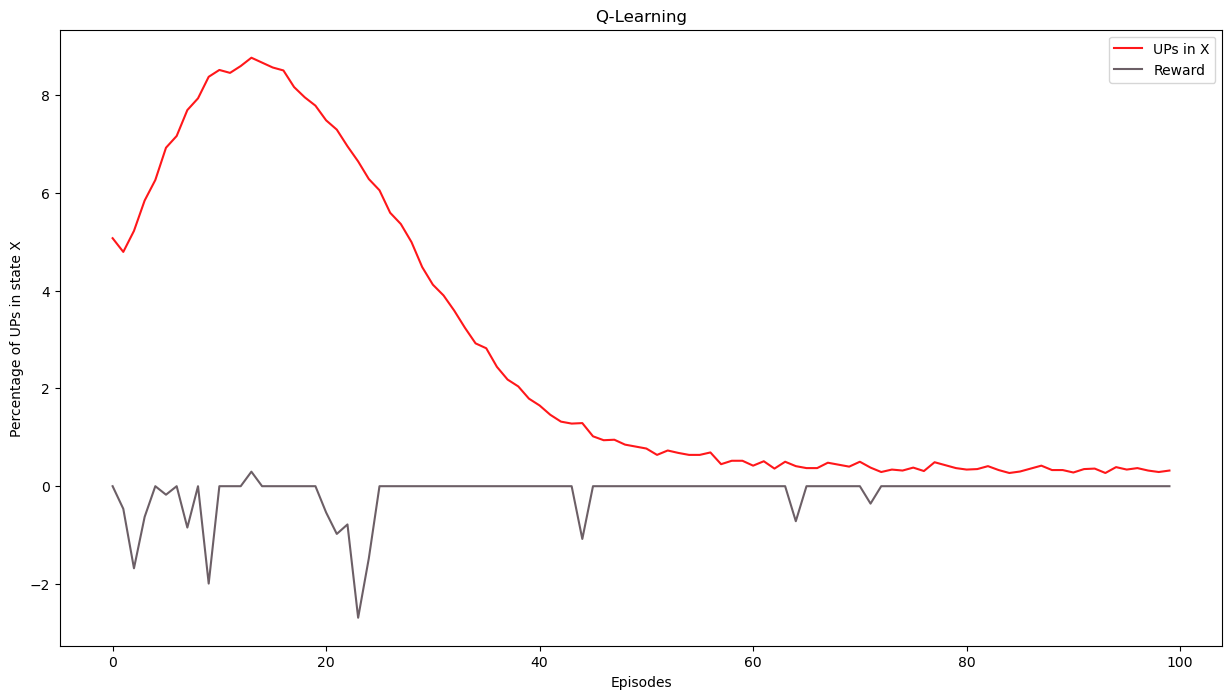

In [26]:
plt.figure(figsize=(15,8))
plt.plot(num_of_ups/10000*100, label='UPs in X', color='#FF171A')
plt.plot(q_reward, color='#6C5F66', label='Reward')
plt.legend()
plt.ylabel('Percentage of UPs in state X')
plt.xlabel('Episodes')
plt.title(r'Q-Learning')
plt.show()

In [27]:
def mdp_double_q_learning(enviroment, num_of_tests=1000, num_of_episodes=300):
    num_of_ups = np.zeros(num_of_episodes)

    for _ in range (num_of_tests):
        q_a_table = {
            state:np.zeros(9) for state in enviroment.state_actions.keys()}
        q_b_table = {
            state:np.zeros(9) for state in enviroment.state_actions.keys()
        }
        rewards = np.zeros(num_of_episodes)

        for episode in range(0, num_of_episodes):
            state = enviroment.reset()

            terminated =False

            while not terminated:
                if np.random.rand() < EPSILON:
                    action = enviroment.random_action()
                else:
                    q_table = q_a_table[state][enviroment.available_actions(enviroment.state)] + \
                        q_b_table[state][enviroment.available_actions(enviroment.state)]
                
                    max_q = np.where(np.max(q_table) == q_table)[0]
                    action = np.random.choice(max_q)
                next_state, reward, terminated,_ = enviroment.step(action)

                if state == 'X' and action ==1:
                    num_of_ups[episode] += 1
                
                if np.random.rand() < 0.5:
                    q_a_table[state][action] += ALPHA * (reward + GAMMA * q_b_table[next_state][np.argmax(q_a_table[next_state])] \
                                                         - q_a_table[state][action])
                else:
                    q_b_table[state][action] += ALPHA * (reward + GAMMA * q_a_table[next_state][np.argmax(q_b_table[next_state])] \
                                                         - q_b_table[state][action])
                
                state = next_state
                rewards[episode] += reward
    return rewards, q_a_table, q_b_table, num_of_ups
                    

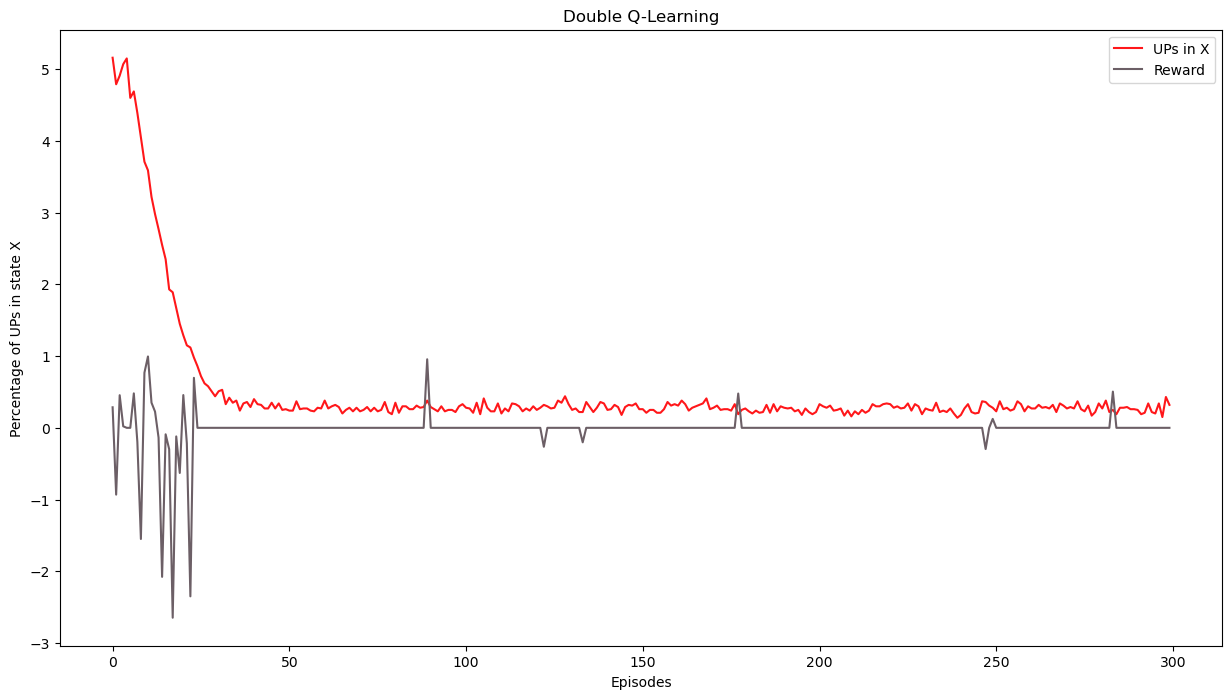

In [29]:
dq_reward, _, _, dq_num_of_ups = mdp_double_q_learning(mdp_env)

plt.figure(figsize=(15,8))
plt.plot(dq_num_of_ups/10000*100, label='UPs in X', color='#FF171A')
plt.plot(dq_reward, color='#6C5F66', label='Reward')
plt.legend()
plt.ylabel('Percentage of UPs in state X')
plt.xlabel('Episodes')
plt.title(r'Double Q-Learning')
plt.show()

In [31]:
def q_learning_Taxi(env, num_of_episodes=100):

    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros(num_of_episodes)

    for episode in range(0, num_of_episodes):
        state = env.reset()[0]

        terminated = False

        while not terminated:
            if np.random.rand() < EPSILON:
                action = env.action_space.sample()
            else:
                max_q = np.where(np.max(q_table[state]) == q_table[state])[0]
                action = np.random.choice(max_q)
            next_state, reward, terminated,truncated, info = env.step(action)
            q_table[state, action] += ALPHA * (reward+ GAMMA*np.max(q_table[next_state]) - q_table[state, action])
            state = next_state
            rewards[episode] += reward
    return rewards, q_table

In [32]:
def double_q_learning_Taxi(env, num_of_episodes=100):

    q_a_table = np.zeros([env.observation_space.n, env.action_space.n])
    q_b_table = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = np.zeros(num_of_episodes)

    for episode in range(0, num_of_episodes):
        state = env.reset()[0]

        terminated = False

        while not terminated:
            if np.random.rand() < EPSILON:
                action = env.action_space.sample()
            else:
                q_table = q_a_table[state] + q_b_table[state]
                max_q = np.where(np.max(q_table) == q_table)[0]
                action = np.random.choice(max_q)
            next_state, reward, terminated, truncated, info = env.step(action)

            if np.random.rand() < 0.5:
                q_a_table[state, action] += ALPHA * (reward + GAMMA * q_b_table[next_state, np.argmax(q_a_table[next_state])] \
                                                                     - q_a_table[state, action])
            else:
                q_b_table[state, action] += ALPHA * (reward + GAMMA * q_a_table[next_state, np.argmax(q_b_table[next_state])]\
                                                                     - q_b_table[state, action])

            state= next_state
            rewards[episode] += reward

    return rewards, q_a_table, q_b_table

In [33]:
enviroment = gym.make("Taxi-v3")

In [34]:
q_reward, q_table = q_learning_Taxi(enviroment)
dq_reward, q_a_table, q_b_table = double_q_learning_Taxi(enviroment)

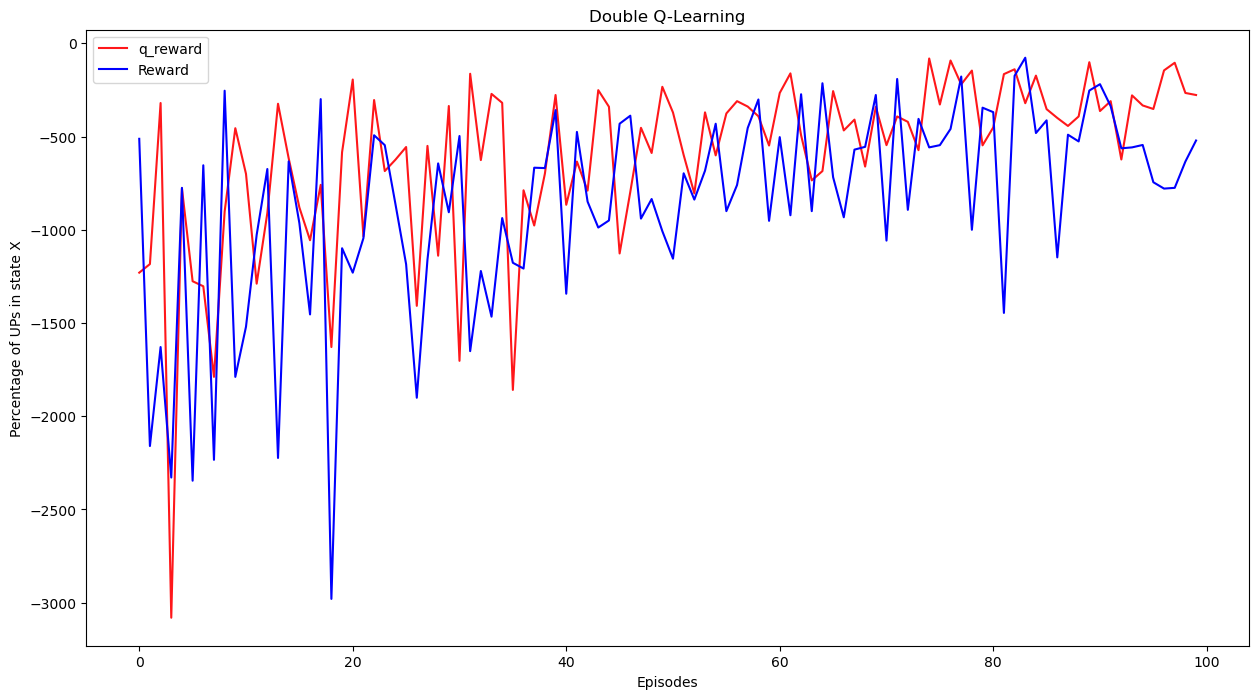

In [37]:
plt.figure(figsize=(15,8))
plt.plot(q_reward, label='q_reward', color='#FF171A')
plt.plot(dq_reward, color='blue', label='Reward')
plt.legend()
plt.ylabel('Percentage of UPs in state X')
plt.xlabel('Episodes')
plt.title(r'Double Q-Learning')
plt.show()